
Eligibility Summary:
Medicaid: Not eligible for Medicaid.
CHIP: Eligible for CHIP for members: [10, 6]
Marketplace: Eligible for marketplace coverage with potential premium tax credits for members: [40, 38]
Medicare: Not eligible for Medicare.

Advice:
2. Your children may qualify for CHIP for their healthcare needs.
3. Consider enrolling in a marketplace plan to lower your healthcare costs with premium tax credits.

Medical Expense Management Recommendations:
1. With a significant leftover income, consider investing 30% into a comprehensive health insurance plan.

Leftover Income: $45000.00


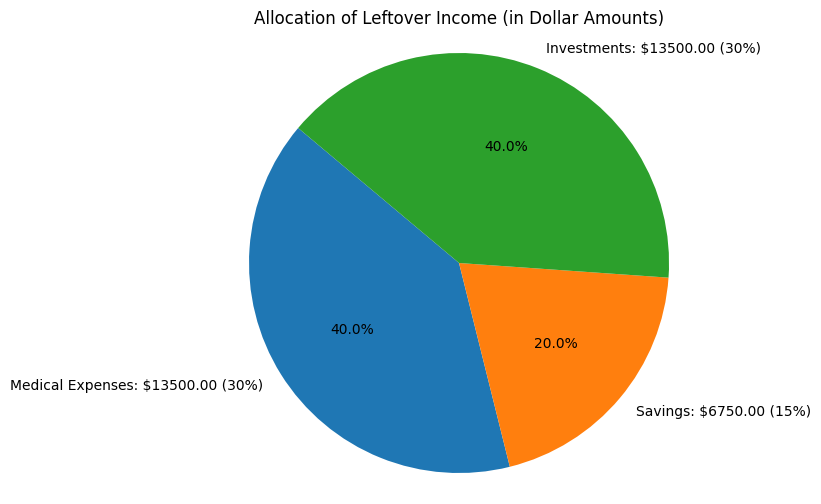

In [62]:
import matplotlib.pyplot as plt

class HealthInsuranceEligibility:
    def __init__(self, income, family_size, ages, state, citizenship_status, residency_status, medical_necessity, disability, expenses):
        self.income = income
        self.family_size = family_size
        self.ages = ages
        self.state = state
        self.citizenship_status = citizenship_status
        self.residency_status = residency_status
        self.medical_necessity = medical_necessity
        self.disability = disability
        self.expenses = expenses
        self.fpl = self.get_federal_poverty_level()
        self.state_specific_thresholds = self.get_state_thresholds()

    def get_federal_poverty_level(self):
        fpl_2024 = {
            1: 13800,
            2: 18600,
            3: 23400,
            4: 28200,
            5: 33000,
            6: 37800,
        }
        if self.family_size > 6:
            additional_amount = (fpl_2024[6] - fpl_2024[5]) / (6 - 5)
            fpl_2024[self.family_size] = fpl_2024[6] + additional_amount * (self.family_size - 6)
        
        return fpl_2024.get(self.family_size)

    def get_state_thresholds(self):
        thresholds = {
            "Texas": {"medicaid": 138, "chip": 300},
        }
        return thresholds.get(self.state, {"medicaid": None, "chip": None})

    def is_citizen_or_resident(self):
        return self.citizenship_status == "U.S. citizen" and self.residency_status == "State resident"

    def calculate_remaining_income(self):
        passive_expenses = self.expenses.get("passive", 0)
        active_expenses = self.expenses.get("active", 0)
        remaining_income = self.income - (passive_expenses + active_expenses)
        return remaining_income

    def check_medicaid_eligibility(self):
        if not self.is_citizen_or_resident():
            return "Not eligible for Medicaid: Must be a U.S. citizen and state resident."
        if self.income < (self.fpl * self.state_specific_thresholds["medicaid"] / 100):
            eligible_members = [age for age in self.ages if age < 18 or age >= 65 or self.disability or self.medical_necessity]
            return f"Eligible for Medicaid for members: {eligible_members}" if eligible_members else "Not eligible for Medicaid."
        return "Not eligible for Medicaid."

    def check_chip_eligibility(self):
        if self.income < (self.fpl * self.state_specific_thresholds["chip"] / 100):
            eligible_members = [age for age in self.ages if age < 19]
            return f"Eligible for CHIP for members: {eligible_members}" if eligible_members else "Not eligible for CHIP."
        return "Not eligible for CHIP."

    def check_marketplace_eligibility(self):
        if self.income < (self.fpl * 100 / 100):
            return "Not eligible for marketplace coverage. Consider Medicaid."
        elif self.income <= (self.fpl * 400 / 100):
            eligible_members = [age for age in self.ages if age >= 18]
            return f"Eligible for marketplace coverage with potential premium tax credits for members: {eligible_members}"
        else:
            return "Eligible for marketplace coverage but may not qualify for premium tax credits."

    def check_medicare_eligibility(self):
        eligible_members = []
        for i, age in enumerate(self.ages):
            if age >= 65 or (self.disability[i] and age < 65):
                eligible_members.append(age)
        return f"Eligible for Medicare for members: {eligible_members}" if eligible_members else "Not eligible for Medicare."

    def calculate_leftover_income(self):
        passive_expenses = self.expenses.get("passive", 0)
        active_expenses = self.expenses.get("active", 0)
        return self.income - (passive_expenses + active_expenses)

    def manage_medical_expenses(self):
        leftover_income = self.calculate_leftover_income()
        recommendations = []
        allocations = {}

        if leftover_income < 0:
            recommendations.append("1. Consider reducing non-essential expenses.")
            allocations = {"Medical Expenses": 100, "Savings": 0, "Investments": 0}
        elif 0 <= leftover_income < 500:
            recommendations.append("1. Prioritize preventive care to avoid costly medical bills.")
            allocations = {"Medical Expenses": 10, "Savings": 20, "Investments": 0}
        elif 500 <= leftover_income < 1500:
            recommendations.append("1. Set aside 20% of your leftover income for unexpected medical expenses.")
            allocations = {"Medical Expenses": 20, "Savings": 30, "Investments": 0}
        else:
            recommendations.append("1. With a significant leftover income, consider investing 30% into a comprehensive health insurance plan.")
            allocations = {"Medical Expenses": 30, "Savings": 15, "Investments": 30}
        return "\n".join(recommendations), allocations

    def eligibility_summary(self):
        medicaid_status = self.check_medicaid_eligibility()
        chip_status = self.check_chip_eligibility()
        marketplace_status = self.check_marketplace_eligibility()
        medicare_status = self.check_medicare_eligibility()

        return {
            "Medicaid": medicaid_status,
            "CHIP": chip_status,
            "Marketplace": marketplace_status,
            "Medicare": medicare_status,
        }

    def advice_based_on_eligibility(self):
        eligibility_summary = self.eligibility_summary()
        advice = []

        if "Eligible" in eligibility_summary["Medicaid"]:
            advice.append("1. You may apply for Medicaid for additional health coverage.")

        if "Eligible" in eligibility_summary["CHIP"]:
            advice.append("2. Your children may qualify for CHIP for their healthcare needs.")

        if "Eligible" in eligibility_summary["Marketplace"]:
            advice.append("3. Consider enrolling in a marketplace plan to lower your healthcare costs with premium tax credits.")

        if "Not eligible" in eligibility_summary["Medicaid"] and "Not eligible" in eligibility_summary["CHIP"]:
            advice.append("4. You may explore private insurance options or marketplace plans.")

        return "\n".join(advice) if advice else "No specific advice at this time."

    def visualize_allocations(self, leftover_income, allocations):
        actual_allocations = {key: (leftover_income * percentage / 100) for key, percentage in allocations.items()}
        labels = [f"{key}: ${value:.2f} ({percentage}%)" for key, value, percentage in zip(actual_allocations.keys(), actual_allocations.values(), allocations.values())]
        sizes = actual_allocations.values()

        plt.figure(figsize=(8, 6))
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
        plt.title('Allocation of Leftover Income (in Dollar Amounts)')
        plt.axis('equal')
        plt.show()

def main():
    income = 70000
    family_size = 4
    ages = [40, 38, 10, 6]

    medical_necessity_input = "no,no,no,no"
    medical_necessity = [value.strip().lower() == 'yes' for value in medical_necessity_input.split(',')]
    
    disability_input = "no,no,no,no"
    disability = [value.strip().lower() == 'yes' for value in disability_input.split(',')]
    
    state = "Texas"
    citizenship_status = "U.S. citizen"
    residency_status = "State resident"
    
    passive_expenses = 15000
    active_expenses = 10000
    
    expenses = {
        "passive": passive_expenses,
        "active": active_expenses
    }
    
    eligibility_checker = HealthInsuranceEligibility(income, family_size, ages, state, citizenship_status, residency_status, medical_necessity, disability, expenses)
    
    print("\nEligibility Summary:")
    for program, status in eligibility_checker.eligibility_summary().items():
        print(f"{program}: {status}")

    print("\nAdvice:")
    print(eligibility_checker.advice_based_on_eligibility())

    print("\nMedical Expense Management Recommendations:")
    recommendations, allocations = eligibility_checker.manage_medical_expenses()
    print(recommendations)
    
    leftover_income = eligibility_checker.calculate_leftover_income()
    print(f"\nLeftover Income: ${leftover_income:.2f}")
    
    eligibility_checker.visualize_allocations(leftover_income, allocations)

if __name__ == "__main__":
    main()


In [91]:
import random

# Health Insurance Eligibility Class
class HealthInsuranceEligibility:
    def __init__(self, income, family_size, ages, state, citizenship_status, residency_status, medical_necessity, disability, expenses):
        self.income = income
        self.family_size = family_size
        self.ages = ages
        self.state = state
        self.citizenship_status = citizenship_status
        self.residency_status = residency_status
        self.medical_necessity = medical_necessity
        self.disability = disability
        self.expenses = expenses
        self.fpl = self.get_federal_poverty_level()
        self.state_specific_thresholds = self.get_state_thresholds()

    def get_federal_poverty_level(self):
        fpl_2024 = {
            1: 13800,
            2: 18600,
            3: 23400,
            4: 28200,
            5: 33000,
            6: 37800,
        }
        if self.family_size > 6:
            additional_amount = (fpl_2024[6] - fpl_2024[5]) / (6 - 5)
            fpl_2024[self.family_size] = fpl_2024[6] + additional_amount * (self.family_size - 6)
        
        return fpl_2024.get(self.family_size)

    def get_state_thresholds(self):
        thresholds = {
            "Texas": {"medicaid": 138, "chip": 300},
            "California": {"medicaid": 138, "chip": 250}
        }
        return thresholds.get(self.state, {"medicaid": None, "chip": None})

    def is_citizen_or_resident(self):
        return self.citizenship_status == "U.S. citizen" and self.residency_status == "State resident"

    def calculate_remaining_income(self):
        passive_expenses = self.expenses.get("passive", 0)
        active_expenses = self.expenses.get("active", 0)
        remaining_income = self.income - (passive_expenses + active_expenses)
        return remaining_income

    def check_medicaid_eligibility(self):
        if not self.is_citizen_or_resident():
            return "Not eligible for Medicaid: Must be a U.S. citizen and state resident."
        if self.income < (self.fpl * self.state_specific_thresholds["medicaid"] / 100):
            eligible_members = [age for age in self.ages if age < 18 or age >= 65 or self.disability or self.medical_necessity]
            return f"Eligible for Medicaid for members: {eligible_members}" if eligible_members else "Not eligible for Medicaid."
        return "Not eligible for Medicaid."

    def check_chip_eligibility(self):
        if self.income < (self.fpl * self.state_specific_thresholds["chip"] / 100):
            eligible_members = [age for age in self.ages if age < 19]
            return f"Eligible for CHIP for members: {eligible_members}" if eligible_members else "Not eligible for CHIP."
        return "Not eligible for CHIP."

    def check_marketplace_eligibility(self):
        if self.income < (self.fpl * 100 / 100):
            return "Not eligible for marketplace coverage. Consider Medicaid."
        elif self.income <= (self.fpl * 400 / 100):
            eligible_members = [age for age in self.ages if age >= 18]
            return f"Eligible for marketplace coverage with potential premium tax credits for members: {eligible_members}"
        else:
            return "Eligible for marketplace coverage but may not qualify for premium tax credits."

    def check_medicare_eligibility(self):
        eligible_members = []
        for i, age in enumerate(self.ages):
            if age >= 65 or (self.disability[i] and age < 65):
                eligible_members.append(age)
        return f"Eligible for Medicare for members: {eligible_members}" if eligible_members else "Not eligible for Medicare."

    def eligibility_summary(self):
        medicaid_status = self.check_medicaid_eligibility()
        chip_status = self.check_chip_eligibility()
        marketplace_status = self.check_marketplace_eligibility()
        medicare_status = self.check_medicare_eligibility()

        return {
            "Medicaid": medicaid_status,
            "CHIP": chip_status,
            "Marketplace": marketplace_status,
            "Medicare": medicare_status,
        }

    def advice_based_on_eligibility(self):
        eligibility_summary = self.eligibility_summary()
        advice = []

        if "Eligible" in eligibility_summary["Medicaid"]:
            advice.append("1. You may apply for Medicaid for additional health coverage.")

        if "Eligible" in eligibility_summary["CHIP"]:
            advice.append("2. Your children may qualify for CHIP for their healthcare needs.")

        if "Eligible" in eligibility_summary["Marketplace"]:
            advice.append("3. Consider enrolling in a marketplace plan to lower your healthcare costs with premium tax credits.")

        if "Not eligible" in eligibility_summary["Medicaid"] and "Not eligible" in eligibility_summary["CHIP"]:
            advice.append("4. You may explore private insurance options or marketplace plans.")

        return "\n".join(advice) if advice else "No specific advice at this time."


# Stakeholders in the Patient Journey
class HomewardHealth:
    def __init__(self, visit_data):
        self.visit_data = visit_data

    def send_visit_data(self):
        visit_type = random.choice(['urgent', 'routine'])
        return {"patient_id": self.visit_data['patient_id'], "telehealth": True, "visit_type": visit_type}

    def simulate_visit_outcome(self, visit_type):
        if visit_type == 'urgent':
            return "Urgent care provided. Follow-up with primary care scheduled."
        elif visit_type == 'routine':
            return "Routine check-up provided. No immediate concerns."
        return "Emergency care provided at private facility. Full payment required upfront."

class MainStreetHealth:
    def __init__(self, visit_data):
        self.visit_data = visit_data

    def coordinate_care(self):
        visit_type = self.visit_data.get('visit_type', 'routine')
        if visit_type == 'urgent':
            return {"care_coordination": "Emergency care scheduled at local hospital."}
        return {"care_coordination": "Scheduled telehealth appointment with a local specialist."}

class LilianCare:
    def __init__(self, provider_data):
        self.provider_data = provider_data

    def evaluate_provider_incentives(self):
        incentives = []
        for provider in self.provider_data:
            incentive = {"provider_id": provider["id"]}

            if provider["location"] == "rural":
                incentive["incentive"] = "Bonus for working in rural area and providing primary care"
            elif provider["location"] == "urban" and provider["specialty"] == "specialist":
                incentive["incentive"] = "Performance-based incentive for urban specialist"
            elif provider["location"] == "suburban":
                incentive["incentive"] = "Standard incentive for suburban providers"
            else:
                incentive["incentive"] = "Standard incentive"
            
            if provider["experience"] > 7:
                incentive["incentive"] += " + Experience-based bonus"
            if provider["patient_satisfaction"] > 4.5:
                incentive["incentive"] += " + High patient satisfaction bonus"

            incentives.append(incentive)
        return incentives


class ProCredEx:
    def __init__(self, provider_data):
        self.provider_data = provider_data

    def update_provider_credentialing(self, incentives):
        updated_credentials = []
        for provider in self.provider_data:
            credential_update = {
                "provider_id": provider["id"],
                "incentive": next((inc["incentive"] for inc in incentives if inc["provider_id"] == provider["id"]), None)
            }

            if provider["credential_status"] == "compliant":
                credential_update["status"] = "Compliant - No action required."
            elif provider["credential_status"] == "requires review":
                credential_update["status"] = "Review required due to policy update or performance assessment."
            elif provider["credential_status"] == "missing credentials":
                credential_update["status"] = "Credentials missing - provider must submit documents for verification."
            elif provider["credential_status"] == "pending review":
                credential_update["status"] = "Pending review - decision pending based on recent evaluation."
            else:
                credential_update["status"] = "Unknown status - manual review required."

            updated_credentials.append(credential_update)
        
        return updated_credentials

class HiHealth:
    def __init__(self, claims_data, eligibility_checker):
        self.claims_data = claims_data
        self.eligibility_checker = eligibility_checker  # Pass eligibility_checker to HiHealth

    def process_claims(self):
        claims_status = []
        eligibility_summary = self.eligibility_checker.eligibility_summary()

        for claim in self.claims_data:
            claim_info = {"patient_id": claim["patient_id"], "service": claim["service"]}
            
            # Check if any of the members in the eligibility summary are eligible for Medicaid, CHIP, or Medicare
            eligible_medicaid = [age for age in self.eligibility_checker.ages if age < 18 or age >= 65 or self.eligibility_checker.disability[self.eligibility_checker.ages.index(age)]]
            eligible_chip = [age for age in self.eligibility_checker.ages if age < 19]
            eligible_medicare = [age for age in self.eligibility_checker.ages if age >= 65 or (self.eligibility_checker.disability[self.eligibility_checker.ages.index(age)] and age < 65)]

            # Check eligibility summary for each service
            if claim["service"] == "emergency":
                if any([eligible_medicaid, eligible_chip, eligible_medicare]):
                    claim_info["claim_status"] = "Approved for emergency services."
                    claim_info["coverage"] = "Full coverage under Medicaid/CHIP/Medicare."
                else:
                    claim_info["claim_status"] = "No claims submitted. Full payment required for emergency services."
                    claim_info["coverage"] = "Full payment required for emergency care."
            else:
                if "Eligible" in eligibility_summary["Medicaid"]:
                    claim_info["claim_status"] = "Approved for routine services under Medicaid."
                    claim_info["coverage"] = "Full coverage under Medicaid."
                elif "Eligible" in eligibility_summary["CHIP"]:
                    claim_info["claim_status"] = "Approved for routine services under CHIP."
                    claim_info["coverage"] = "Full coverage under CHIP."
                elif "Eligible" in eligibility_summary["Medicare"]:
                    claim_info["claim_status"] = "Approved for routine services under Medicare."
                    claim_info["coverage"] = "Full coverage under Medicare."
                else:
                    claim_info["claim_status"] = "No claims submitted. Full payment required for non-covered services."
                    claim_info["coverage"] = "Full payment required."

            claims_status.append(claim_info)
        
        return claims_status



class PaymentProcessing:
    def __init__(self, payment_data, eligibility_summary, service_type, family_size):
        self.payment_data = payment_data
        self.eligibility_summary = eligibility_summary  # Pass the eligibility summary here
        self.service_type = service_type  # Type of service (emergency or routine)
        self.family_size = family_size  # Size of the family

    def calculate_payment(self):
        # Print the income to debug the error
        print(f"Income used in payment processing: {self.payment_data['income']}")  # Ensure we're referencing it correctly
        
        # Determine the dynamic payment plan based on eligibility and other factors
        payment_plan = "Full upfront payment required."
        
        # Check eligibility for Medicaid, CHIP, or Medicare
        if "Eligible" in self.eligibility_summary["Medicaid"]:
            if self.service_type == "emergency":
                payment_plan = "Emergency services covered by Medicaid. No payment required."
            else:
                payment_plan = "Routine services covered by Medicaid. No payment required."
        
        elif "Eligible" in self.eligibility_summary["CHIP"]:
            if self.service_type == "emergency":
                payment_plan = "Emergency services covered by CHIP. No payment required."
            else:
                payment_plan = "Routine services covered by CHIP. No payment required."
        
        elif "Eligible" in self.eligibility_summary["Medicare"]:
            if self.service_type == "emergency":
                payment_plan = "Emergency services covered by Medicare. No payment required."
            else:
                payment_plan = "Routine services covered by Medicare. No payment required."
        
        # If no eligibility, it remains full payment
        if "Not eligible" in self.eligibility_summary["Medicaid"] and "Not eligible" in self.eligibility_summary["CHIP"] and "Not eligible" in self.eligibility_summary["Medicare"]:
            payment_plan = "No eligibility for Medicaid, CHIP, or Medicare. Full payment required for all services."

        # If income is low, apply discount/payment plan
        if self.payment_data['income'] <= 20000:  # Example threshold for low-income patients
            if self.service_type == "routine":
                payment_plan = "Reduced payment plan for routine services available. Installments possible."
            elif self.service_type == "emergency":
                payment_plan = "Emergency services are fully covered due to low income. No upfront payment required."
        
        # Handle cases for high-income patients (greater than $50,000 as an example threshold)
        elif self.payment_data['income'] > 50000:
           
                payment_plan = "Full payment required for routine services due to high income."
            

        # Handle large family size (higher payment options if not covered)
        if self.family_size > 5:
            payment_plan += " Larger family size. Payment plan adjustments may be required."

        return {"payment_plan": payment_plan}




# Example Execution
# 1. Health Insurance Eligibility (simulated based on given patient details)

eligibility_checker = HealthInsuranceEligibility(
    income=50000,
    family_size=2,
    ages=[25, 35],
    state="California",
    citizenship_status="U.S. citizen",
    residency_status="State resident",
    medical_necessity=False,
    disability=[False, False],
    expenses={"passive": 2000, "active": 1500}
)

print(f"Health Insurance Eligibility: {eligibility_checker.eligibility_summary()}")
print(f"Advice based on eligibility: {eligibility_checker.advice_based_on_eligibility()}")

# 2. Homeward Health Visit
homeward_health = HomewardHealth(visit_data={"patient_id": 101})
visit_data = homeward_health.send_visit_data()
visit_outcome = homeward_health.simulate_visit_outcome(visit_data["visit_type"])
print(f"Homeward Health Visit Data: {visit_data}")
print(f"Visit Outcome: {visit_outcome}")

# 3. Care Coordination by MainStreetHealth
main_street_health = MainStreetHealth(visit_data=visit_data)
care_coordination = main_street_health.coordinate_care()
print(f"Care Coordination: {care_coordination}")

# 4. Provider Incentives by LilianCare
provider_data = [
    {"id": 1, "location": "rural", "specialty": "primary care", "experience": 8, "patient_satisfaction": 4.7, "credential_status": "compliant"}
]
lilian_care = LilianCare(provider_data=provider_data)
incentives = lilian_care.evaluate_provider_incentives()
print(f"Provider Incentives: {incentives}")

# 5. Credential Updates by ProCredEx
pro_cred_ex = ProCredEx(provider_data=provider_data)
credential_updates = pro_cred_ex.update_provider_credentialing(incentives)
print(f"Updated Credentials: {credential_updates}")

# 6. HiHealth Claims Processing
hi_health = HiHealth(claims_data=[{"patient_id": 101, "service": "emergency"}], eligibility_checker=eligibility_checker)
claims_status = hi_health.process_claims()
print(f"HiHealth Claims Status: {claims_status}")

# 7. Payment Processing

payment_processing = PaymentProcessing(
    payment_data={"income": eligibility_checker.income},
    eligibility_summary=eligibility_checker.eligibility_summary(),
    service_type="emergency",
    family_size=eligibility_checker.family_size
)

payment_history = payment_processing.calculate_payment()
print(f"Income used in payment processing:" + str(payment_history))



Health Insurance Eligibility: {'Medicaid': 'Not eligible for Medicaid.', 'CHIP': 'Not eligible for CHIP.', 'Marketplace': 'Eligible for marketplace coverage with potential premium tax credits for members: [25, 35]', 'Medicare': 'Not eligible for Medicare.'}
Advice based on eligibility: 3. Consider enrolling in a marketplace plan to lower your healthcare costs with premium tax credits.
4. You may explore private insurance options or marketplace plans.
Homeward Health Visit Data: {'patient_id': 101, 'telehealth': True, 'visit_type': 'routine'}
Visit Outcome: Routine check-up provided. No immediate concerns.
Care Coordination: {'care_coordination': 'Scheduled telehealth appointment with a local specialist.'}
Provider Incentives: [{'provider_id': 1, 'incentive': 'Bonus for working in rural area and providing primary care + Experience-based bonus + High patient satisfaction bonus'}]
Updated Credentials: [{'provider_id': 1, 'incentive': 'Bonus for working in rural area and providing primary 